In [17]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("gas_turbines.csv")
print(df.shape)
df

(15039, 11)


,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [3]:
df.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [4]:
X=np.loadtxt("gas_turbines.csv",delimiter=",",skiprows=1,usecols=(0,1,2,3,4,5,6,8,9,10))
Y=np.loadtxt("gas_turbines.csv",delimiter=",",skiprows=1,usecols=(7))

In [34]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(15,input_dim=10,activation='ReLU'))
model.add(tf.keras.layers.Dense(9,activation='ReLU'))
model.add(tf.keras.layers.Dense(1))

In [35]:
model.compile(loss='mean_squared_error',optimizer= 'adam')

In [55]:
history=model.fit(X,Y,validation_split=0.2,epochs=50,batch_size=1000)

Epoch 1/50
13/13 [==============================] - 0s 5ms/step - loss: 0.9954 - val_loss: 2.3340
Epoch 2/50
13/13 [==============================] - 0s 3ms/step - loss: 1.4594 - val_loss: 2.1668
Epoch 3/50
13/13 [==============================] - 0s 3ms/step - loss: 1.7207 - val_loss: 1.5664
Epoch 4/50
13/13 [==============================] - 0s 3ms/step - loss: 1.4512 - val_loss: 1.4510
Epoch 5/50
13/13 [==============================] - 0s 3ms/step - loss: 1.3545 - val_loss: 1.1252
Epoch 6/50
13/13 [==============================] - 0s 3ms/step - loss: 0.9349 - val_loss: 1.1496
Epoch 7/50
13/13 [==============================] - 0s 3ms/step - loss: 0.9676 - val_loss: 1.3343
Epoch 8/50
13/13 [==============================] - 0s 3ms/step - loss: 0.9551 - val_loss: 1.6020
Epoch 9/50
13/13 [==============================] - 0s 3ms/step - loss: 1.1420 - val_loss: 1.5223
Epoch 10/50
13/13 [==============================] - 0s 4ms/step - loss: 1.0156 - val_loss: 1.2000
Epoch 11/50
13/13 [

In [56]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

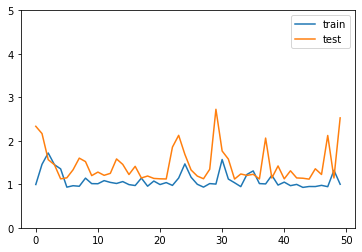

In [57]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim(0,5)
plt.legend(['train','test'])

In [58]:
print("Average Loss of model: "+str(np.mean(history.history['val_loss'])))

Average Loss of model: 1.4418631267547608
